## Imports and data preprocessing

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import PowerTransformer, RobustScaler
from transformer_pipeline import get_features_transformer,drop_rows
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_csv("data/movie_statistic_dataset.csv")
df = drop_rows(df)

## K-Means Model

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
KM_df = df.copy()
KM_transformer = get_features_transformer(MinMaxScaler(),
                                          MinMaxScaler(),
                                          MinMaxScaler(),
                                          MinMaxScaler())
KM_X = KM_transformer.fit_transform(KM_df)
KM_X.shape

(3490, 20)

<h2 align='center'>Elbow Method</h2>

In [27]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 
        scores.append(wcss)
    return scores

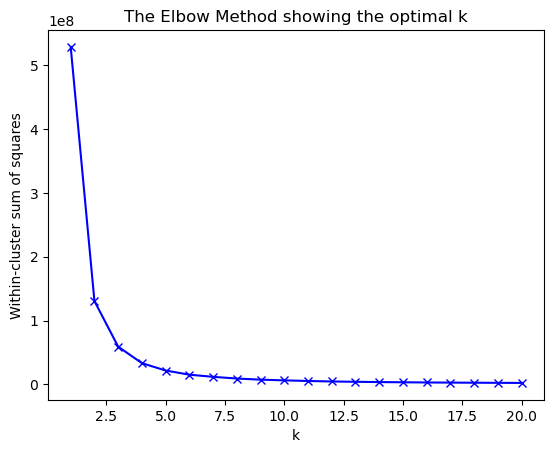

In [28]:
wcss_vec = count_wcss_scores(KM_X, 20)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=4, random_state=14)
kmeans.fit(KM_X)
y_kmeans = kmeans.predict(KM_X)
KM_df['cluster'] = y_kmeans
# display(HTML(KM_df.to_html()))

In [30]:
print(KM_df['cluster'].value_counts())

2    1355
0     976
3     654
1     505
Name: cluster, dtype: int64


<h2 align='center'>Silhouette Score</h2>

In [31]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

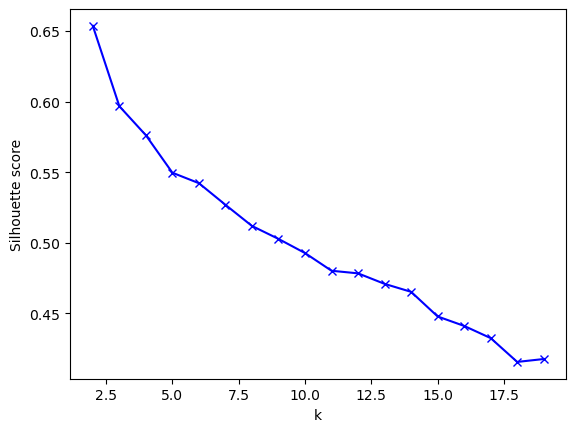

In [32]:
cluster_num_seq = range(2, 20)
silhouette_vec = count_clustering_scores(KM_X, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=6, random_state=14)
kmeans.fit(KM_X)
y_kmeans = kmeans.predict(KM_X)
KM_df['cluster'] = y_kmeans
# display(HTML(KM_df.to_html()))

In [34]:
print(KM_df['cluster'].value_counts())

5    894
1    722
4    607
0    464
2    414
3    389
Name: cluster, dtype: int64
